<a href="https://colab.research.google.com/github/Mun-Robbery/Mun-Robbery/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Training pipeline
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Traning loop
#   - forward pass: compute prediction
#   - backward pass: fradients
#   - update weights

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

epoch: 10, loss = 4314.7783
epoch: 20, loss = 3220.3992
epoch: 30, loss = 2428.6567
epoch: 40, loss = 1855.2446
epoch: 50, loss = 1439.5420
epoch: 60, loss = 1137.8950
epoch: 70, loss = 918.8236
epoch: 80, loss = 759.5984
epoch: 90, loss = 643.7867
epoch: 100, loss = 559.4962


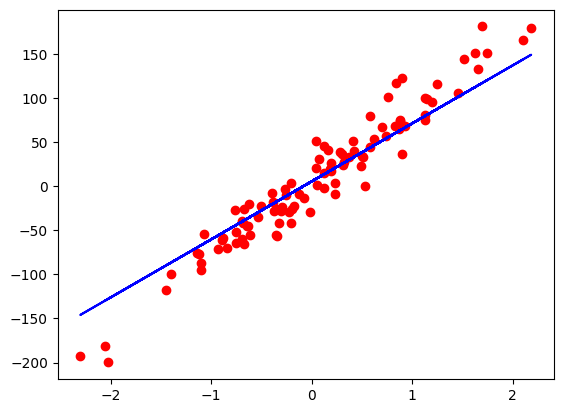

In [7]:
# 0) prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) model

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer

learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 3) training loop

num_epoch = 100

for epoch in range(num_epoch):
  # forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)
  # backward
  loss.backward()
  # update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

